## Primer análisis exploratorio de los datos.

Referencias:

https://github.com/datosgcba/test_alerta_noviazgo_violento - Enunciados de las preguntas.

https://data.buenosaires.gob.ar/dataset/test-alerta-sobre-noviazgo-violento - Descarga de los .csv.

Importando librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Cargando datos.

In [2]:
datos_17 = pd.read_csv("resultados-del-test-2017-18.csv",sep=";")
datos_18 = pd.read_csv("resultados-del-test-2018-19.csv")
datos = [datos_17,datos_18] #Nos guardamos todos los datos en una lista
print("Cantidad de datos 2017: "+ str(datos_17.shape))
print("Cantidad de datos 2018: "+ str(datos_18.shape))

Cantidad de datos 2017: (11643, 15)
Cantidad de datos 2018: (4360, 18)


Revisamos los datos.

In [3]:
datos_17.head(5)

,FECHA,HORA,EDAD,GENERO,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10
0,13/02/2017,23:41,28,HOMBRE,PALERMO,B,B,B,B,B,B,B,B,B,B
1,13/02/2017,20:09,23,MUJER,BALVANERA,B,B,B,B,B,B,B,B,B,B
2,13/02/2017,20:07,22,MUJER,BALVANERA,A,A,A,A,A,A,A,A,B,C
3,13/02/2017,20:04,34,MUJER,VILLA PUEYRREDON,C,C,B,C,B,C,C,C,C,B
4,13/02/2017,19:34,31,MUJER,CABALLITO,C,C,C,C,C,C,C,C,C,C


In [4]:
datos_18.head(5)

,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13
0,2019-01-23,17:31:00,21,Hombre,Villa Riachuelo,B,C,B,C,C,C,B,C,C,C,A,B,C
1,2019-01-23,13:59:00,20,Mujer,Otro,B,B,B,B,A,B,B,B,C,C,B,B,B
2,2019-01-23,10:24:00,63,Mujer,Floresta,B,C,C,C,C,C,C,C,C,C,C,C,C
3,2019-01-23,00:20:00,30,Mujer,Otro,B,A,B,A,B,B,B,B,B,B,B,A,C
4,2019-01-22,23:44:00,27,Mujer,Caballito,B,C,B,B,C,C,C,C,B,C,C,C,C


Verificamos valores faltantes.

In [5]:
print("Datos faltantes:")
print(datos_17.isna().sum().sum(),datos_18.isna().sum().sum())

Datos faltantes:
0 0


Verificamos las propiedades de los datos categoricos.

In [6]:
print(list(datos_17.columns))

['FECHA', 'HORA', 'EDAD', 'GENERO', 'BARRIO', 'PREG_1', 'PREG_2', 'PREG_3', 'PREG_4', 'PREG_5', 'PREG_6', 'PREG_7', 'PREG_8', 'PREG_9', 'PREG_10']


In [7]:
print(list(datos_18.columns))

['fecha', 'hora', 'edad', 'genero', 'barrio', 'pregunta_1', 'pregunta_2', 'pregunta_3', 'pregunta_4', 'pregunta_5', 'pregunta_6', 'pregunta_7', 'pregunta_8', 'pregunta_9', 'pregunta_10', 'pregunta_11', 'pregunta_12', 'pregunta_13']


In [8]:
datos_17.columns = datos_18.columns.tolist()[0:15] #Le ponemos a las columnas nombres estandarizados para los dos datasets.

Verificamos los valores unicos de las variables categoricas.

In [9]:
for i in datos:
    Categoricas = i.columns.drop(["fecha","hora","edad"])
    for j in Categoricas: 
        print(j.capitalize()+":")
        print(i[j].unique())
        print("- - - - - - - \n")

Genero:
['HOMBRE' 'MUJER' 'OTRO']
- - - - - - - 

Barrio:
['PALERMO' 'BALVANERA' 'VILLA PUEYRREDON' 'CABALLITO' 'BOEDO' 'MATADEROS'
 'RECOLETA' 'MONTE CASTRO' 'BELGRANO' 'BARRACAS' 'OTRO' 'VILLA URQUIZA'
 'VILLA CRESPO' 'LINIERS' 'COGHLAN' 'ALMAGRO' 'AGRONOMIA' 'SAN TELMO'
 'VILLA LURO' 'CONSTITUCION' 'MONTSERRAT' 'PARQUE CHAS' 'CHACARITA'
 'VILLA DEVOTO' 'FLORES' 'VILLA RIACHUELO' 'PARQUE PATRICIOS'
 'VILLA SOLDATI' 'NUÑEZ' 'RETIRO' 'NUEVA POMPEYA' 'VILLA DEL PARQUE'
 'SAN NICOLAS' 'VELEZ SARSFIELD' 'PUERTO MADERO' 'LA BOCA'
 'PARQUE CHACABUCO' 'SAN CRISTOBAL' 'VILLA REAL' 'PARQUE AVELLANEDA'
 'SAAVEDRA' 'VILLA LUGANO' 'COLEGIALES' 'VERSALLES' 'FLORESTA'
 'LA PATERNAL' 'VILLA GENERAL MITRE' 'VILLA ORTUZAR' 'NONE']
- - - - - - - 

Pregunta_1:
['B' 'A' 'C']
- - - - - - - 

Pregunta_2:
['B' 'A' 'C']
- - - - - - - 

Pregunta_3:
['B' 'A' 'C']
- - - - - - - 

Pregunta_4:
['B' 'A' 'C']
- - - - - - - 

Pregunta_5:
['B' 'A' 'C']
- - - - - - - 

Pregunta_6:
['B' 'A' 'C']
- - - - - - - 

Pregunt

Mostramos algunas graficas acerca de las variables.

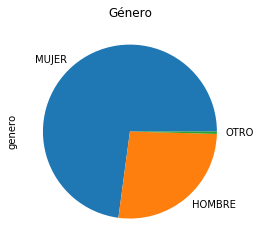

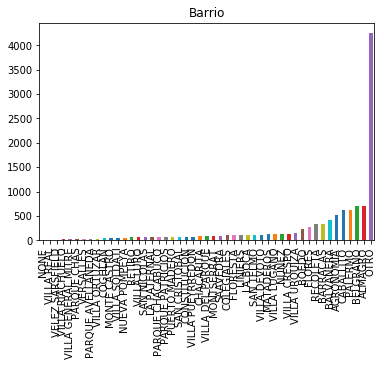

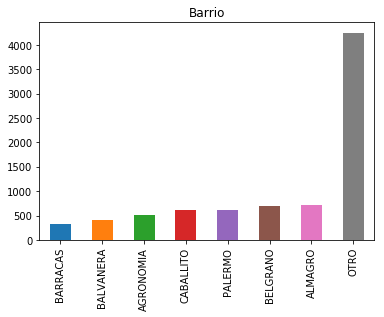

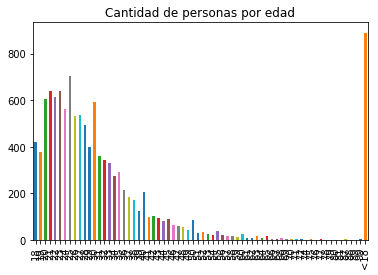

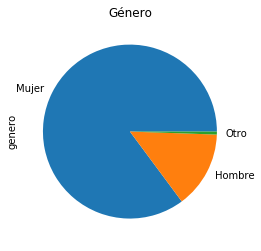

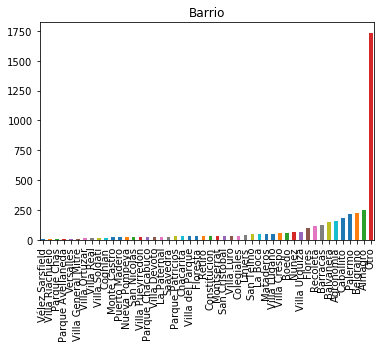

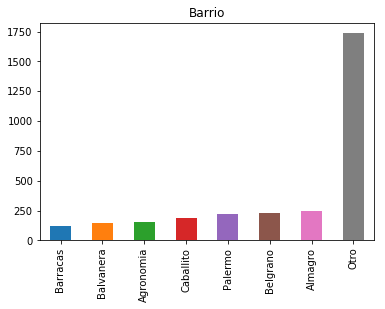

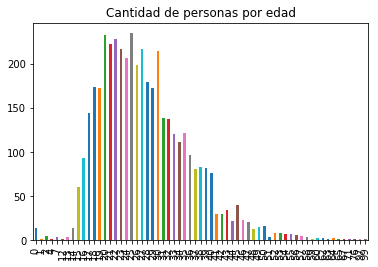

In [10]:
for db in datos:
    db["genero"].value_counts().plot("pie", title = "Género")
    plt.show()
    db["barrio"].value_counts().sort_values().plot("bar", title = "Barrio")
    plt.show()
    db["barrio"].value_counts().sort_values().iloc[-8:].plot("bar", title = "Barrio")
    plt.show()
    db["edad"].value_counts().sort_index().plot("bar", title = "Cantidad de personas por edad")
    plt.xticks(rotation = "vertical")
    plt.show()


Nos guardamos los datos de genero femenino

In [11]:
Mujer_17 = datos_17[datos_17["genero"]=="MUJER"]
Mujer_18 = datos_18[datos_18["genero"]=="Mujer"]

Nos quedamos solo con los datos de los tests

In [12]:
Respuestas_m_17 = Mujer_17.drop(['fecha', 'hora', 'edad', 'genero', 'barrio'],axis=1)
Respuestas_m_18 = Mujer_18.drop(['fecha', 'hora', 'edad', 'genero', 'barrio'],axis=1)

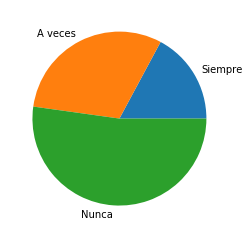

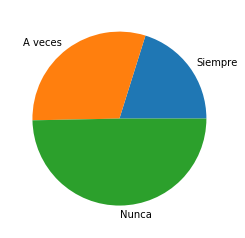

In [13]:
plt.pie([(Respuestas_m_17 == "A").sum().sum(),(Respuestas_m_17 == "B").sum().sum(),(Respuestas_m_17 == "C").sum().sum()],labels=["Siempre","A veces","Nunca"],)
plt.show()
plt.pie([(Respuestas_m_18 == "A").sum().sum(),(Respuestas_m_18 == "B").sum().sum(),(Respuestas_m_18 == "C").sum().sum()],labels=["Siempre","A veces","Nunca"])
plt.show()

Hacemos el mismo proceso con los otros generos:
Hombres y Otros

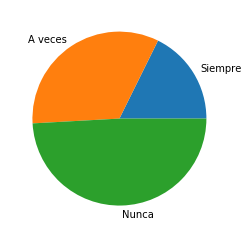

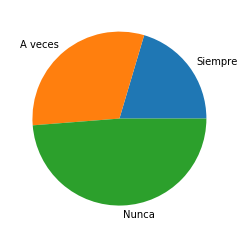

In [14]:
Hombre_17 = datos_17[datos_17["genero"]=="HOMBRE"]
Hombre_18 = datos_18[datos_18["genero"]=="Hombre"]

Respuestas_h_17 = Hombre_17.drop(['fecha', 'hora', 'edad', 'genero', 'barrio'],axis=1)
Respuestas_h_18 = Hombre_18.drop(['fecha', 'hora', 'edad', 'genero', 'barrio'],axis=1)

plt.pie([(Respuestas_h_17 == "A").sum().sum(),(Respuestas_h_17 == "B").sum().sum(),(Respuestas_h_17 == "C").sum().sum()],labels=["Siempre","A veces","Nunca"],)
plt.show()
plt.pie([(Respuestas_h_18 == "A").sum().sum(),(Respuestas_h_18 == "B").sum().sum(),(Respuestas_h_18 == "C").sum().sum()],labels=["Siempre","A veces","Nunca"])
plt.show()

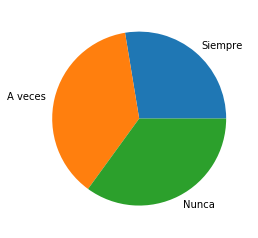

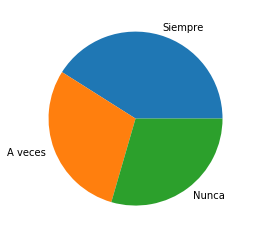

In [15]:
Otro_17 = datos_17[datos_17["genero"]=="OTRO"]
Otro_18 = datos_18[datos_18["genero"]=="Otro"]

Respuestas_o_17 = Otro_17.drop(['fecha', 'hora', 'edad', 'genero', 'barrio'],axis=1)
Respuestas_o_18 = Otro_18.drop(['fecha', 'hora', 'edad', 'genero', 'barrio'],axis=1)

plt.pie([(Respuestas_o_17 == "A").sum().sum(),(Respuestas_o_17 == "B").sum().sum(),(Respuestas_o_17 == "C").sum().sum()],labels=["Siempre","A veces","Nunca"],)
plt.show()
plt.pie([(Respuestas_o_18 == "A").sum().sum(),(Respuestas_o_18 == "B").sum().sum(),(Respuestas_o_18 == "C").sum().sum()],labels=["Siempre","A veces","Nunca"])
plt.show()

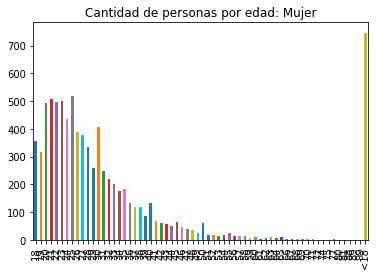

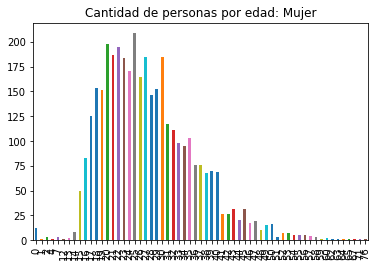

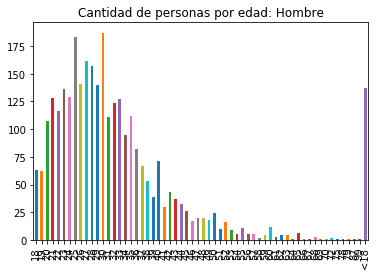

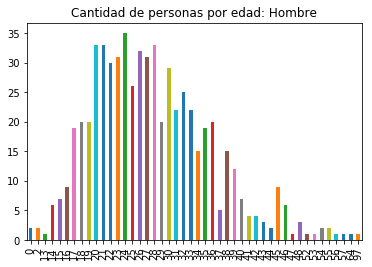

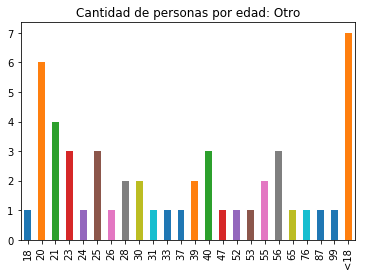

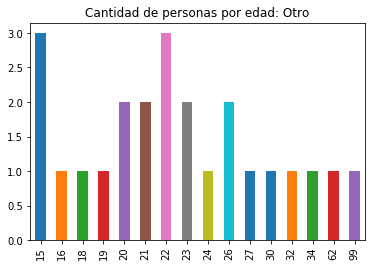

In [16]:
datos_por_genero = [Mujer_17,Mujer_18,Hombre_17,Hombre_18,Otro_17,Otro_18]
for db in datos_por_genero:
    db["edad"].value_counts().sort_index().plot("bar", title = "Cantidad de personas por edad: "+db.genero.iloc[0].capitalize())
    plt.xticks(rotation = "vertical")
    plt.show()